<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/xor_kernel_svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,metrics,preprocessing
from sklearn.model_selection import cross_val_score,train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.kernel_approximation import RBFSampler
from matplotlib.colors import ListedColormap

In [6]:
np.random.seed(0)
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)

,0
0,0
1,0
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,0


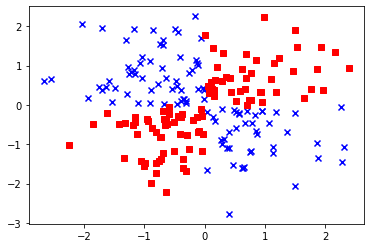

In [7]:
%matplotlib inline

plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==0,0],X_xor[y_xor==0,1],c='r',marker='s',label='0')
plt.show()

In [8]:
X_std=X_xor
z=y_xor

In [9]:
clf_result=svm.SVC(kernel='rbf',gamma=1/2,C=1.0,class_weight='balanced',random_state=0)
clf_result.fit(X_std,z)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
scores=cross_val_score(clf_result,X_std,z,cv=10)
print(scores.mean())
print(scores.std())

0.9400000000000001
0.048989794855663564


In [13]:
X_train, X_test, train_label, test_label=train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print(ac_score)

0.85


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


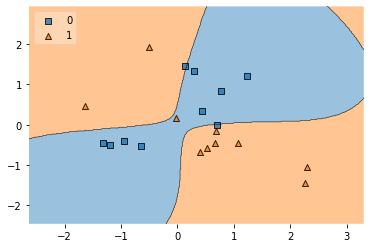

In [15]:
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)

plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2)
 